In [142]:
import numpy as np
import matplotlib.pyplot as plt

from kafe2 import XYContainer, XYFit, Plot
from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties.unumpy import nominal_values as n
from uncertainties.unumpy import std_devs as s

---

In [143]:
# defining a function to calculate the diameter
def get_d(val):
    return (val + val[::-1])[0:int(len(val)/2)]

In [164]:
# defining the fitfunction for platedistance
def fit_func(n, d, c, lam):
    return  -4*lam*150**2/d * n + c

---

In [165]:
# putting in the measurements
las_green = unp.uarray([4565.27967601, 3942.64630401, 3190.44580764, 2161.01480869, 1974.41062895, 3010.05677808, 3778.54401984, 4408.68028892], 
                        [24.86296645,  31.02908877,  37.05728543, 52.52759128,  68.01741214, 45.54605021,  28.00900705,  26.87892956]) * 10 **-3
las_uv = unp.uarray([4517.00985292, 3875.14034087, 3100.20391521, 2016.95224844, 1997.71080539, 3110.96640119, 3906.93578295, 4547.48775808],
                        [33.10363934,  52.11123433,  53.50252451,  89.97817218, 131.97575855, 144.42204593, 136.27639343,  69.42893047]) * 10 **-3

In [166]:
# calculating the diameters
D_las_green = get_d(las_green) 
D_las_uv = get_d(las_uv)

---

## Der Laser

---

/home/mika/miniconda3/envs/P3/lib/python3.12/site-packages/scipy/_lib/_finite_differences.py:145: RuntimeWarning: invalid value encountered in divide
  return val / prod((dx,) * n, axis=0)


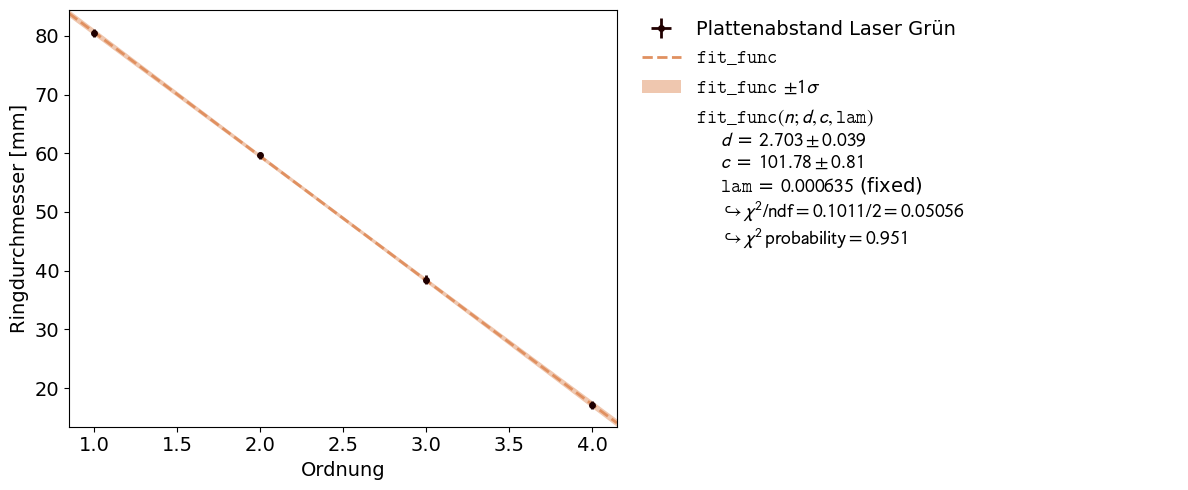

/home/mika/miniconda3/envs/P3/lib/python3.12/site-packages/scipy/_lib/_finite_differences.py:145: RuntimeWarning: invalid value encountered in divide
  return val / prod((dx,) * n, axis=0)


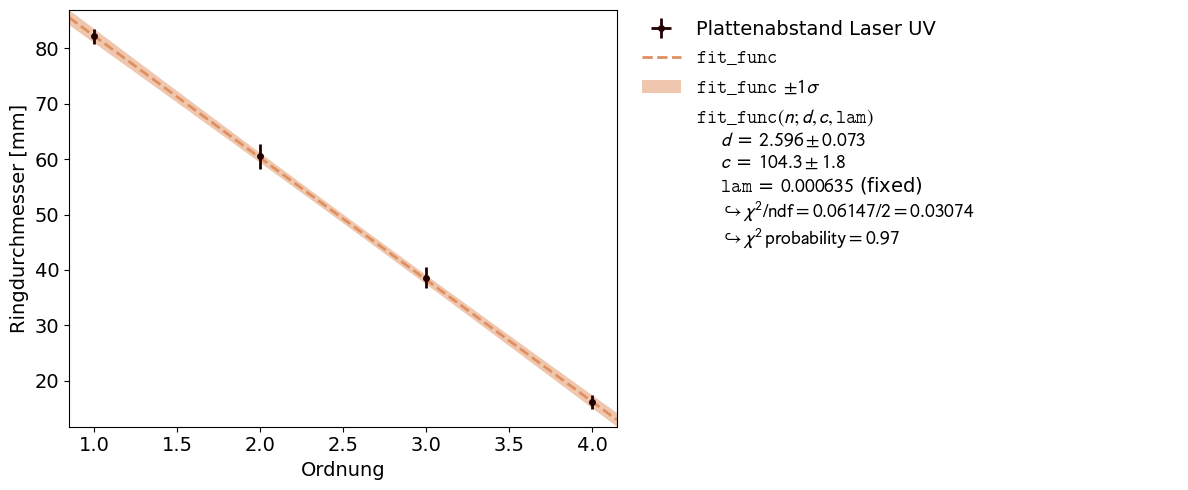

In [167]:
# fitting
od = np.arange(1,5,1)

# fit for laser at green light
cont_las_green = XYContainer(od, n(D_las_green**2))
cont_las_green.label = 'Plattenabstand Laser Grün'
cont_las_green.axis_labels = ('Ordnung','Ringdurchmesser [mm]')

fit_las_green = XYFit(cont_las_green, fit_func)
fit_las_green.add_error('y', s(D_las_green**2))
fit_las_green.fix_parameter('lam', 635*10**-6)
fit_las_green.do_fit()

p_las_green = Plot(fit_las_green)
p_las_green.plot()
plt.show()

# fit for laser at uv light
cont_las_uv = XYContainer(od, n(D_las_uv**2))
cont_las_uv.label = 'Plattenabstand Laser UV'
cont_las_uv.axis_labels = ('Ordnung','Ringdurchmesser [mm]')

fit_las_uv = XYFit(cont_las_uv, fit_func)
fit_las_uv.add_error('y', s(D_las_uv**2))
fit_las_uv.fix_parameter('lam', 635*10**-6)
fit_las_uv.do_fit()

p_las_uv = Plot(fit_las_uv)
p_las_uv.plot()
plt.show()

In [168]:
# getting and printing the diameters
d_green = ufloat(fit_las_green.parameter_values[0], fit_las_green.parameter_errors[0])
d_uv = ufloat(fit_las_uv.parameter_values[0], fit_las_uv.parameter_errors[0])

---

## Die Wellenlängen in Grün

---

In [169]:
# reading the data for green 
green_1 = unp.uarray([4619.84997675, 4126.67054186, 3548.65178801, 2853.27539052, 1893.7838157, 1778.49273663, 2710.5115688,  3383.95291697, 3928.81217882, 4400.75900209] , 
                        [24.0655174,  26.74163454, 31.3078999,  43.36537836, 46.10837729, 57.23854437, 39.12610131, 30.44845063, 24.46813437, 22.37341251]) * 10 **-3
green_2 = unp.uarray([4497.62911806, 3980.50048014, 3380.70684213, 2630.2204984,  1550.86039575, 1447.83852715, 2508.01641704, 3226.35733728, 3800.16802451, 4282.1811168] , 
                        [29.54163223, 22.58471686, 30.24558437, 35.52814745, 41.93666704, 51.00918441, 52.83258682, 28.76134608, 20.48605691, 15.97433743]) * 10 **-3

In [170]:
# calculating the diameters
D_green_1 = get_d(green_1)
D_green_2 = get_d(green_2)

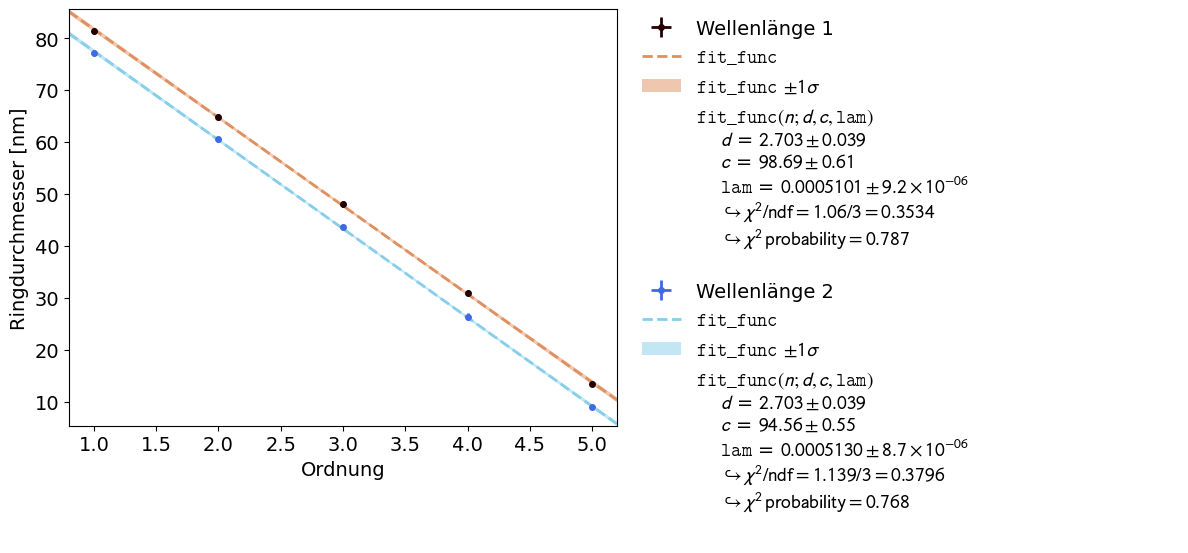

In [177]:
# fitting
od = np.arange(1,6,1)

# fit for laser at green light
cont_green_1 = XYContainer(od, n(D_green_1**2))
cont_green_1.label = 'Wellenlänge 1'
cont_green_1.axis_labels = ('Ordnung','Ringdurchmesser [nm]')

cont_green_2 = XYContainer(od, n(D_green_2**2))
cont_green_2.label = 'Wellenlänge 2'
cont_green_2.axis_labels = ('Ordnung','Ringdurchmesser [nm]')

fit_green_1 = XYFit(cont_green_1, fit_func)
fit_green_1.add_error('y', s(D_green_1**2))
fit_green_1.set_parameter_values(lam=500*10**-6)
fit_green_1.add_parameter_constraint('d', d_green.n, d_green.s)
fit_green_1.do_fit()

fit_green_2 = XYFit(cont_green_2, fit_func)
fit_green_2.add_error('y', s(D_green_2**2))
fit_green_2.set_parameter_values(lam=500*10**-6)
fit_green_2.add_parameter_constraint('d', d_green.n, d_green.s)
fit_green_2.do_fit()

# trying to plot as multifit
plot = Plot([fit_green_1, fit_green_2])
plot.plot()
plt.show()

In [178]:
# getting and printing the values
lam_green_1 = ufloat(fit_green_1.parameter_values[2], fit_green_1.parameter_errors[2])
lam_green_2 = ufloat(fit_green_2.parameter_values[2], fit_green_2.parameter_errors[2])

print(f'{lam_green_1.n} +/- {lam_green_1.s}')
print(f'{lam_green_2.n} +/- {lam_green_2.s}')

0.0005101359487968856 +/- 9.17870031531139e-06
0.0005130145669675872 +/- 8.739543972887075e-06


---

## Die Wellenlängen in UV

---

In [153]:
# reading the data for uv
uv_1 = unp.uarray([4377.2783482, 3946.87361757, 3569.51106761, 3135.11110823, 2632.25665854, 1980.85711438, 1988.47444627, 2600.73687304, 3107.10514718, 3516.87106126, 3885.52331223, 4212.60995614] , 
                    [22.0380007, 8.89264091, 16.52236817, 37.87638942, 22.38415139, 25.40361829, 114.3847664, 15.95116109,  5.56726922,  35.46911576, 6.41336102, 4.91147128]) * 10 **-3
uv_2 = unp.uarray([4210.72930027, 3865.71524162, 3473.57005809, 3015.74958857, 2483.81158538, 1812.8516378,  1789.43568846, 2458.17426319, 2975.20812064, 3413.21367966, 3790.62479511, 4124.09973644] , 
                    [9.20245936e-01, 3.75625535e+00, 6.18424050e+01, 3.73710022e+01, 9.37791031e+02, 2.50488632e+01, 3.65080006e+01, 9.45355167e+02, 2.56002201e+01, 2.21024187e+01, 1.93849810e+01, 7.79630559e+02,]) * 10 **-3
uv_3 = unp.uarray([4042.20662296, 3683.05558457, 3263.15778268, 2785.24405296, 2185.98661073, 1347.11798702, 1348.79314477, 2175.14361547, 2744.57542128, 3218.52994755, 3617.53375081, 3974.12145771] , 
                    [45.30428639, 4.05695998, 31.80363455, 34.00878876, 9.98466933, 113.82592051, 1984.73293075, 27.98758509, 22.3780677, 25.22198678, 22.25716147, 20.86269385]) * 10 **-3

In [154]:
# calculating the diameters
D_uv_1 = get_d(uv_1)
D_uv_2 = get_d(uv_2)
D_uv_3 = get_d(uv_3)

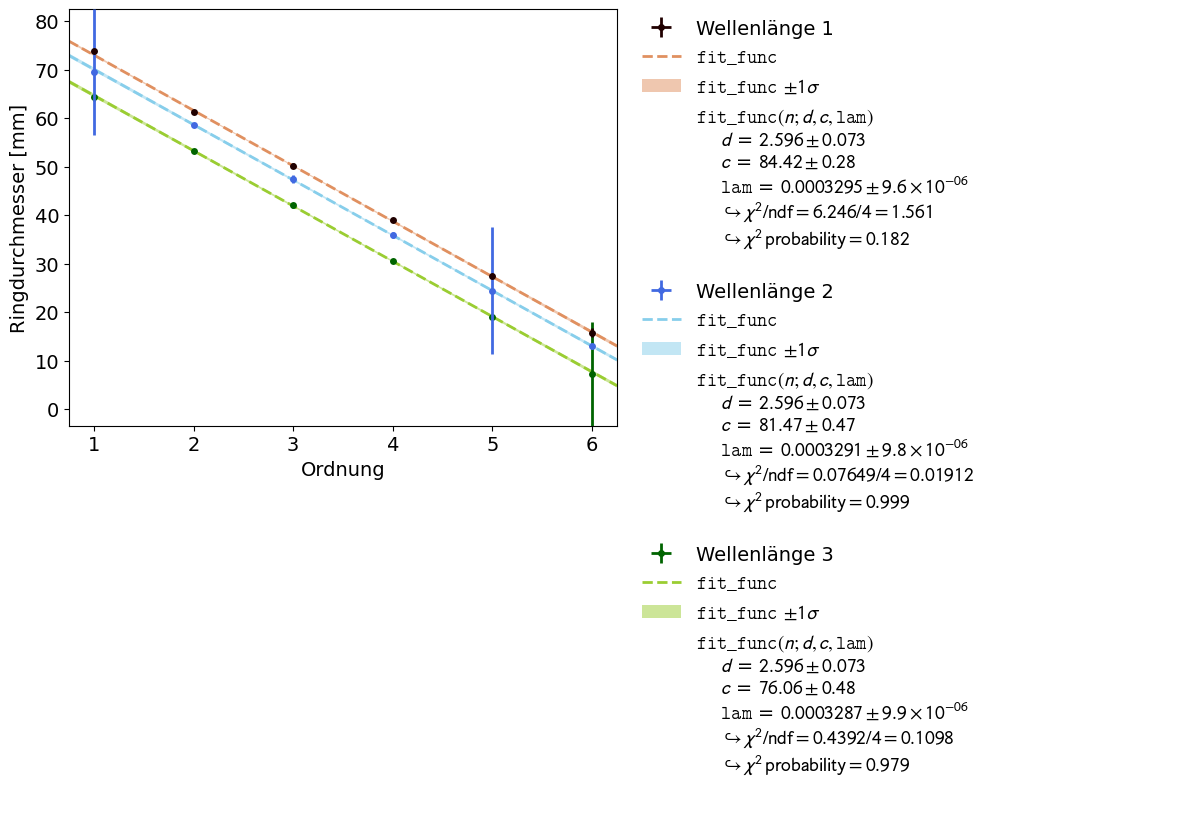

In [176]:
# fitting
od = np.arange(1,7,1)

# fit for laser at uvlight
cont_uv_1 = XYContainer(od, n(D_uv_1**2))
cont_uv_1.label = 'Wellenlänge 1'
cont_uv_1.axis_labels = ('Ordnung','Ringdurchmesser [mm]')

cont_uv_2 = XYContainer(od, n(D_uv_2**2))
cont_uv_2.label = 'Wellenlänge 2'
cont_uv_2.axis_labels = ('Ordnung','Ringdurchmesser [mm]')

cont_uv_3 = XYContainer(od, n(D_uv_3**2))
cont_uv_3.label = 'Wellenlänge 3'
cont_uv_3.axis_labels = ('Ordnung','Ringdurchmesser [mm]')

fit_uv_1 = XYFit(cont_uv_1, fit_func)
fit_uv_1.add_error('y', s(D_uv_1**2))
fit_uv_1.set_parameter_values(lam=500*10**-6)
fit_uv_1.add_parameter_constraint('d', d_uv.n, d_uv.s)
fit_uv_1.do_fit()

fit_uv_2 = XYFit(cont_uv_2, fit_func)
fit_uv_2.add_error('y', s(D_uv_2**2))
fit_uv_2.set_parameter_values(lam=500*10**-6)
fit_uv_2.add_parameter_constraint('d', d_uv.n, d_uv.s)
fit_uv_2.do_fit()

fit_uv_3 = XYFit(cont_uv_3, fit_func)
fit_uv_3.add_error('y', s(D_uv_3**2))
fit_uv_3.set_parameter_values(lam=500*10**-6)
fit_uv_3.add_parameter_constraint('d', d_uv.n, d_uv.s)
fit_uv_3.do_fit()

# trying to plot as multifit
plot = Plot([fit_uv_1, fit_uv_2, fit_uv_3])
plot.plot()
plt.show()

In [181]:
# getting and printing the values
lam_uv_1 = ufloat(fit_uv_1.parameter_values[2], fit_uv_1.parameter_errors[2])
lam_uv_2 = ufloat(fit_uv_2.parameter_values[2], fit_uv_2.parameter_errors[2])
lam_uv_3 = ufloat(fit_uv_3.parameter_values[2], fit_uv_3.parameter_errors[2])

print(f'{lam_uv_1.n} +/- {lam_uv_1.s}')
print(f'{lam_uv_2.n} +/- {lam_uv_2.s}')
print(f'{lam_uv_3.n} +/- {lam_uv_3.s}')

0.00032952792008182814 +/- 9.607382878755893e-06
0.00032914927229792 +/- 9.751199375296961e-06
0.00032873436133801605 +/- 9.884858184987355e-06
